In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [2]:
N = 100
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.75] = 1
lattice_n[init_random<0.75] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1

In [3]:
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()/2

get_energy(lattice_n)

-5018.0

In [4]:
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()/2

get_energy(lattice_p)


-4982.0

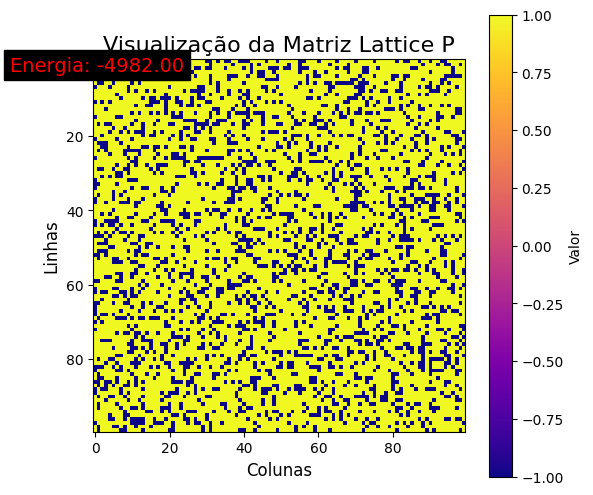

In [5]:
# Plotar a matriz lattice_p
plt.figure(figsize=(6, 6))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_p, cmap='plasma', interpolation='nearest')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice P', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Adicionar o texto com o valor da energia sobre a imagem
plt.text(0.5, 0.99, f'Energia: {get_energy(lattice_p):.2f}', 
         ha='center', va='center', 
         fontsize=14, color='red', 
         bbox=dict(facecolor='black', alpha=1))

# Exibir o gráfico
plt.show()

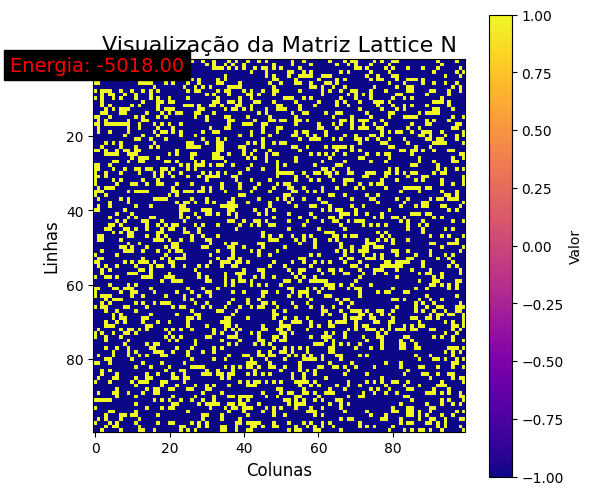

In [6]:
# Plotar a matriz lattice_n
plt.figure(figsize=(6, 6))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_n, cmap='plasma', interpolation='nearest')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice N', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Adicionar o texto com o valor da energia sobre a imagem
plt.text(0.5, 0.99, f'Energia: {get_energy(lattice_n):.2f}', 
         ha='center', va='center', 
         fontsize=14, color='red', 
         bbox=dict(facecolor='black', alpha=1))

# Exibir o gráfico
plt.show()

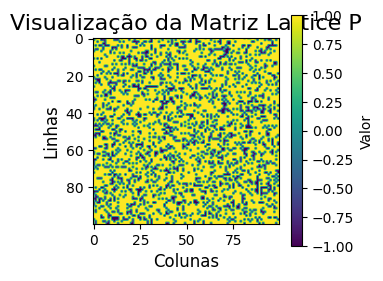

In [7]:
# Plotar a matriz lattice_p
plt.figure(figsize=(3, 3))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_p, cmap='viridis', interpolation='bilinear')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice P', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Exibir o gráfico
plt.show()

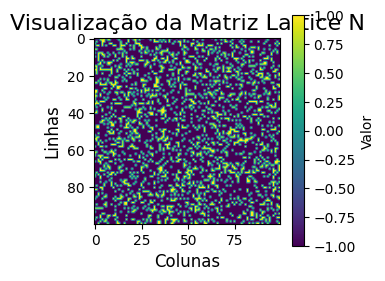

In [8]:
# Plotar a matriz lattice_p
plt.figure(figsize=(3, 3))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_n, cmap='viridis', interpolation='bilinear')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice N', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Exibir o gráfico
plt.show()

In [9]:
@numba.njit("UniTuple(f8[:], 2)(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in range(0,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
            
    return net_spins, net_energy


/home/meteoro/Documentos/saturn/venv/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [35]:
bj = 0.7

spins, energies = metropolis(lattice_n, 1000000, bj, get_energy(lattice_n))

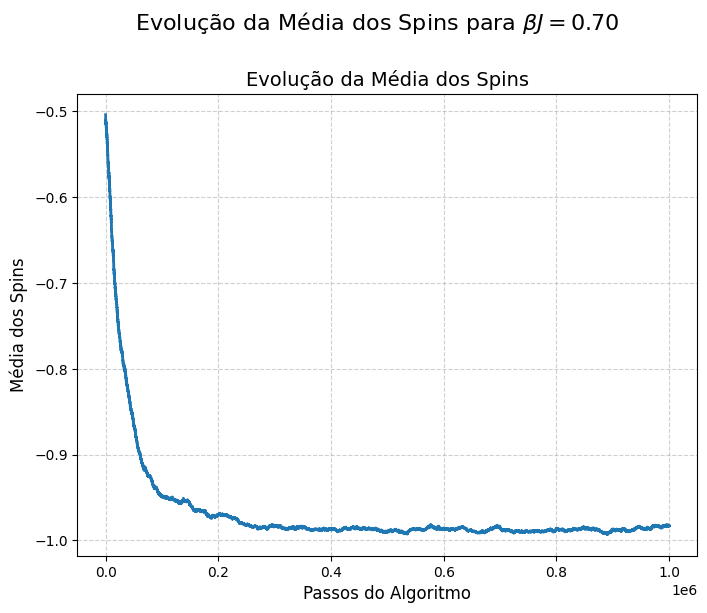

In [37]:
import matplotlib.pyplot as plt

# Definições de cores e estilos
line_color = '#1f77b4'  # Azul escuro para o gráfico da média dos spins
line_style = '-'  # Estilo da linha
line_width = 2  # Largura da linha

# Criação do gráfico da média dos spins
plt.figure(figsize=(8, 6))
plt.plot(spins / N**2, color=line_color, linestyle=line_style, linewidth=line_width)
plt.xlabel('Passos do Algoritmo', fontsize=12)
plt.ylabel('Média dos Spins', fontsize=12)
plt.title('Evolução da Média dos Spins', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)  # Grid mais sutil

# Adiciona o título com o valor de βJ formatado
plt.suptitle(r'Evolução da Média dos Spins para $\beta J=$' + f'{bj:.2f}', y=1.02, fontsize=16)

plt.show()


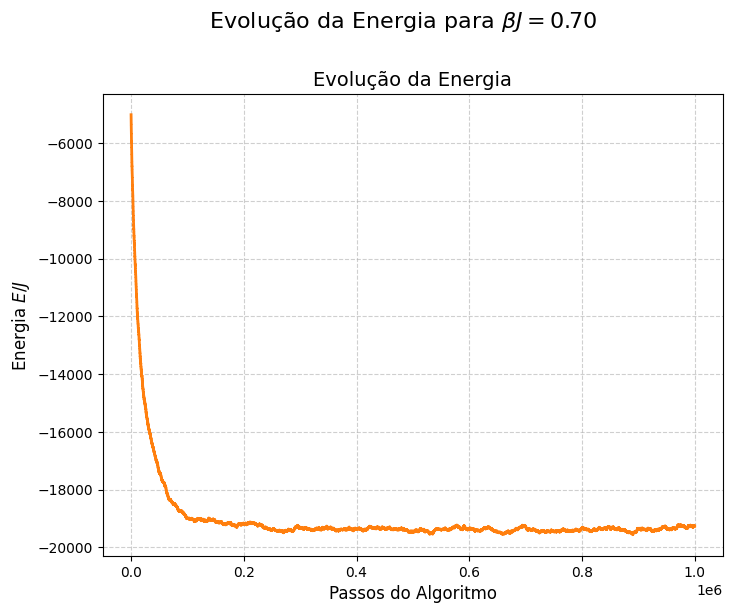

In [38]:
import matplotlib.pyplot as plt

# Definições de cores e estilos
line_color = '#ff7f0e'  # Laranja para o gráfico da energia
line_style = '-'  # Estilo da linha
line_width = 2  # Largura da linha

# Criação do gráfico da energia
plt.figure(figsize=(8, 6))
plt.plot(energies, color=line_color, linestyle=line_style, linewidth=line_width)
plt.xlabel('Passos do Algoritmo', fontsize=12)
plt.ylabel('Energia $E/J$', fontsize=12)
plt.title('Evolução da Energia', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)  # Grid mais sutil

# Adiciona o título com o valor de βJ formatado
plt.suptitle(r'Evolução da Energia para $\beta J=$' + f'{bj:.2f}', y=1.02, fontsize=16)

plt.show()


In [33]:
def get_spin_energy(lattice, BJs):
    ms = np.zeros(len(BJs))
    E_means = np.zeros(len(BJs))
    E_stds = np.zeros(len(BJs))
    for i, bj in enumerate(BJs):
        spins, energies = metropolis(lattice, 1000000, bj, get_energy(lattice))
        ms[i] = spins[-100000:].mean()/N**2
        E_means[i] = energies[-100000:].mean()
        E_stds[i] = energies[-100000:].std()
    return ms, E_means, E_stds
    
BJs = np.arange(0.1, 2, 0.05)
ms_n, E_means_n, E_stds_n = get_spin_energy(lattice_n, BJs)
ms_p, E_means_p, E_stds_p = get_spin_energy(lattice_p, BJs)

In [34]:
print("Magnetizations (lattice_n):", ms_n)
print("Energy Means (lattice_n):", E_means_n)
print("Energy Stds (lattice_n):", E_stds_n)

print("Magnetizations (lattice_p):", ms_p)
print("Energy Means (lattice_p):", E_means_p)
print("Energy Stds (lattice_p):", E_stds_p)

Magnetizations (lattice_n): [-0.00645899 -0.00173061 -0.00935408  0.03041585 -0.01166974  0.0319821
 -0.25611593 -0.71224139 -0.88700858 -0.94207207 -0.96645691 -0.98209523
 -0.98660421 -0.99123297 -0.99523496 -0.99749888 -0.99798055 -0.99846371
 -0.99880598 -0.99945215 -0.99960872 -0.99972774 -0.99968983 -0.99988456
 -0.99989691 -0.99997257 -0.99999379 -0.99997169 -0.9999758  -0.9999908
 -1.         -0.99999059 -1.         -1.         -1.         -1.
 -1.         -1.        ]
Energy Means (lattice_n): [ -1994.89     -3188.98212  -4289.13648  -5503.14068  -7002.75798
  -8444.85702 -11068.37482 -14937.74226 -17027.52628 -18107.53836
 -18743.05426 -19206.87418 -19359.3859  -19512.6512  -19629.78518
 -19709.09422 -19728.5842  -19746.209   -19770.07628 -19780.15716
 -19786.373   -19790.95678 -19788.71734 -19796.09374 -19795.87734
 -19798.90272 -19799.78174 -19798.86776 -19799.09798 -19799.632
 -19800.      -19799.62344 -19800.      -19800.      -19800.
 -19800.      -19800.      -19800.   

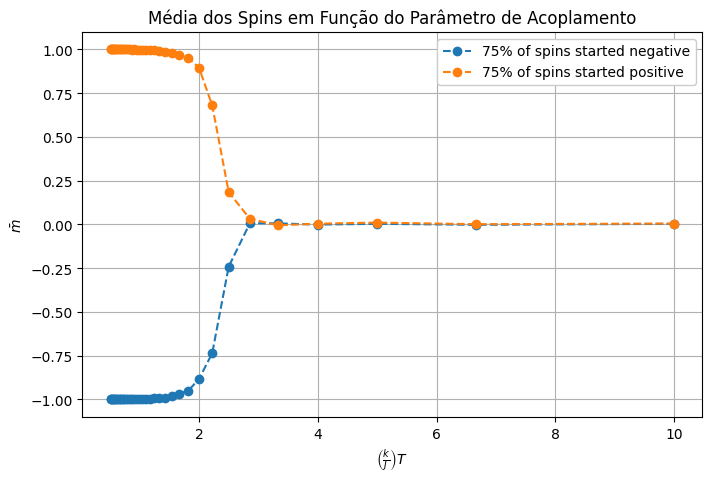

In [ ]:
# Criar o gráfico
plt.figure(figsize=(8,5))
plt.plot(1/BJs, ms_n, 'o--', label='75% of spins started negative')
plt.plot(1/BJs, ms_p, 'o--', label='75% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$\bar{m}$')
plt.title('Média dos Spins em Função do Parâmetro de Acoplamento')
plt.legend(facecolor='white', framealpha=1)
plt.grid(True)
plt.show()

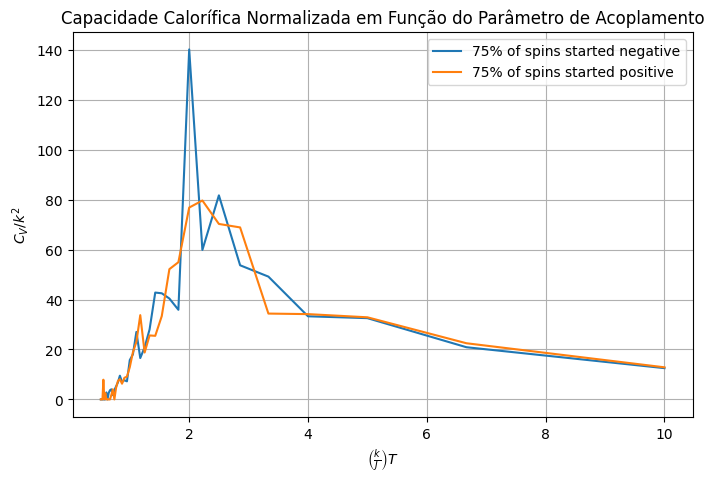

In [39]:
# Criar o gráfico
plt.figure(figsize=(8,5))
plt.plot(1/BJs, E_stds_n * BJs, label='75% of spins started negative')
plt.plot(1/BJs, E_stds_p * BJs, label='75% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$C_V / k^2$')
plt.title('Capacidade Calorífica Normalizada em Função do Parâmetro de Acoplamento')
plt.legend()
plt.grid(True)
plt.show()

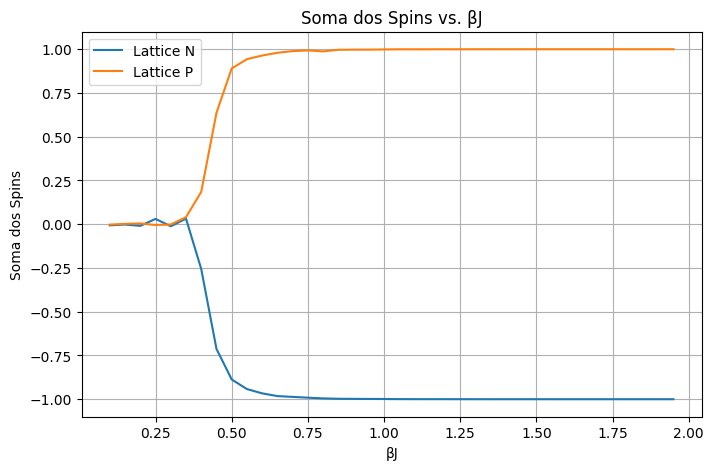

In [40]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(BJs, ms_n, label='Lattice N')
plt.plot(BJs, ms_p, label='Lattice P')
plt.title('Soma dos Spins vs. βJ')
plt.xlabel('βJ')
plt.ylabel('Soma dos Spins')
plt.legend()
plt.grid(True)
plt.show()

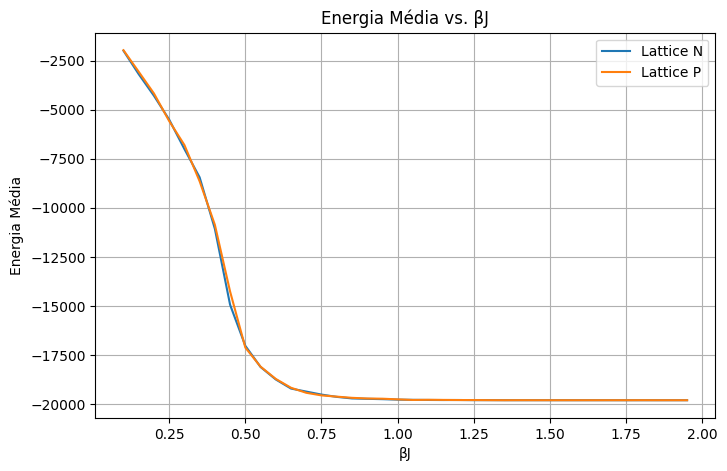

In [41]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(BJs, E_means_n, label='Lattice N')
plt.plot(BJs, E_means_p, label='Lattice P')
plt.title('Energia Média vs. βJ')
plt.xlabel('βJ')
plt.ylabel('Energia Média')
plt.legend()
plt.grid(True)
plt.show()

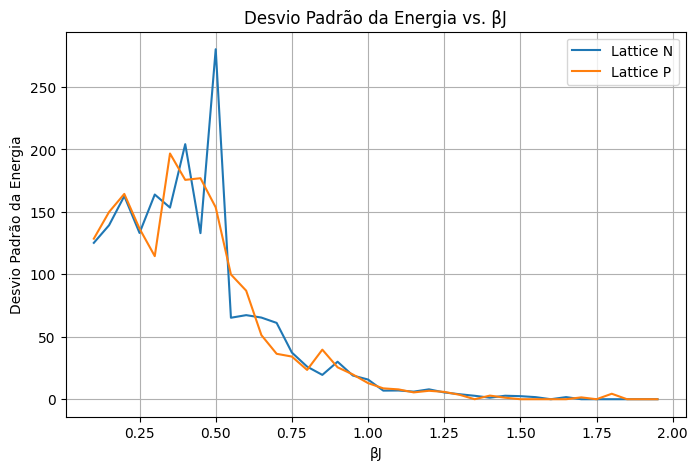

In [42]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(BJs, E_stds_n, label='Lattice N')
plt.plot(BJs, E_stds_p, label='Lattice P')
plt.title('Desvio Padrão da Energia vs. βJ')
plt.xlabel('βJ')
plt.ylabel('Desvio Padrão da Energia')
plt.legend()
plt.grid(True)
plt.show()